In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
mpl.style.use('ggplot')

In [2]:
data_train=pd.read_csv('data/titanic/train.csv')
data_test=pd.read_csv('data/titanic/test.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


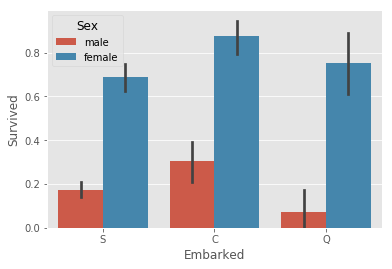

In [3]:
sns.barplot('Embarked','Survived', data=data_train, hue='Sex')

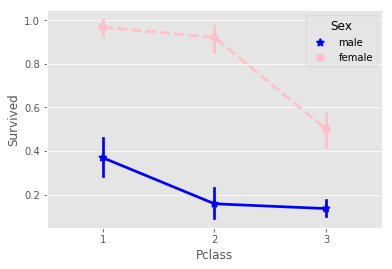

In [4]:
sns.pointplot(x='Pclass',y='Survived',hue='Sex',data=data_train,palette=['blue','pink'],
              markers=['*','o'],linestyles=['-','--'])

In [5]:
age=data_train.Age.fillna(-0.5)
bins=(-1,0,5,12,18,25,35,60,120)
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
cat=pd.cut(age, bins, labels=group_names)
cat.head()

0        Student
1          Adult
2    Young Adult
3    Young Adult
4    Young Adult
Name: Age, dtype: category
Categories (8, object): [Adult < Baby < Child < Senior < Student < Teenager < Unknown < Young Adult]

In [6]:


def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])  # df.Cabin.map (lambda x:x[0]) works as well
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    
    
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

In [7]:
data_train=transform_features(data_train)
data_test=transform_features(data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


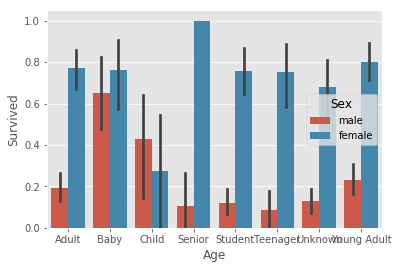

In [9]:
sns.barplot('Age','Survived',hue='Sex',data=data_train)

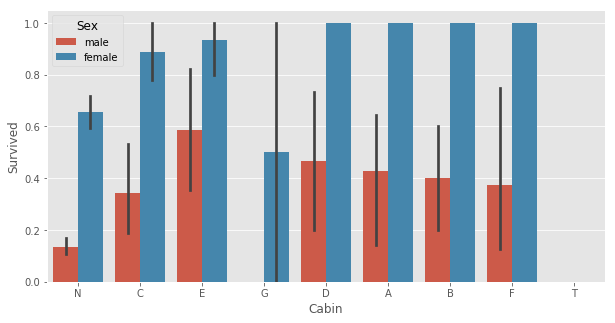

In [10]:
plt.figure(figsize=(10,5))
sns.barplot('Cabin','Survived',hue='Sex',data=data_train)

In [11]:
from sklearn.preprocessing import LabelBinarizer,LabelEncoder

In [12]:
bb=LabelBinarizer()
bb.fit(data_train.NamePrefix)
bb.classes_

array(['Billiard,', 'Capt.', 'Carlo,', 'Col.', 'Cruyssen,', 'Don.', 'Dr.',
       'Gordon,', 'Impe,', 'Jonkheer.', 'Major.', 'Master.', 'Melkebeke,',
       'Messemaeker,', 'Miss.', 'Mlle.', 'Mme.', 'Mr.', 'Mrs.', 'Ms.',
       'Mulder,', 'Pelsmaeker,', 'Planke,', 'Rev.', 'Shawah,', 'Steen,',
       'Velde,', 'Walle,', 'der', 'the', 'y'], 
      dtype='<U12')

In [13]:
bb.transform(data_train.NamePrefix)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
def encode_features(df_train, df_test):
    features=['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_c=pd.concat([df_train[features],df_test[features]])
    
    for feature in features:
        le=LabelEncoder()
        le.fit(df_c[feature])
        df_train[feature]=le.transform(df_train[feature])
        df_test[feature]=le.transform(df_test[feature])
        
    return df_train, df_test

data_train, data_test = encode_features(data_train, data_test)
data_train[:5]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19


In [34]:
from sklearn.model_selection import train_test_split
X=data_train.drop(['Survived','PassengerId'],axis=1).values
y=data_train.Survived
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=23)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [35]:
clf=RandomForestClassifier()
params={'n_estimators':[4,6],
        'max_features':['log2','sqrt'],
        'criterion':['entropy','gini']
       }
grid=GridSearchCV(clf, params, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [4, 6], 'max_features': ['log2', 'sqrt'], 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [18]:
clf=grid.best_estimator_
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [19]:
accuracy_score(y_test, y_pred)

0.81564245810055869

In [20]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10)

In [46]:
outcome=[]
fold=0
for train_index, test_index in kf.split(X,y):
    fold+=1
    x_tr, y_tr=X[train_index],y[train_index]
    x_te,y_te=X[test_index],y[test_index]
    clf.fit(x_tr, y_tr)
    score=accuracy_score(y_te, clf.predict(x_te))
    outcome.append(score)
    print('Fold %d accurary: %.4f' % (fold, score))

print("Average accuracy: %.2f" % np.mean(outcome))

Fold 1 accurary: 0.8000
Fold 2 accurary: 0.8539
Fold 3 accurary: 0.7528
Fold 4 accurary: 0.7753
Fold 5 accurary: 0.8764
Fold 6 accurary: 0.8315
Fold 7 accurary: 0.7753
Fold 8 accurary: 0.7865
Fold 9 accurary: 0.7416
Fold 10 accurary: 0.8090
Average accuracy: 0.80
